In [1]:
# --- setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8,5)

# --- load Titanic dataset (from seaborn)
df = sns.load_dataset("titanic")
df.to_csv("/content/titanic_raw.csv", index=False)

# --- quick sanity checks
display(df.head(10))
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values per column:
deck           688
age     

In [2]:
# --- Step 2: Data Cleaning for Logistic Regression

# Drop irrelevant columns (text or duplicates of info)
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)          # median age
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # most common port

# Verify missing values are handled
print("Missing values after cleaning:\n", df.isna().sum())

# Convert categorical variables into numeric (for model training)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # male=0, female=1
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Final dataset shape
print("\nDataset shape after encoding:", df.shape)
df.head()

Missing values after cleaning:
 survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Dataset shape after encoding: (891, 9)


/tmp/ipython-input-880059871.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)          # median age
/tmp/ipython-input-880059871.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [3]:
# Step 3: Train/test split + Logistic Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️- Separate features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# 2️- Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️- Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 4️- Predict on the test data
y_pred = model.predict(X_test)

# 5️- Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

✅ Accuracy: 0.810

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



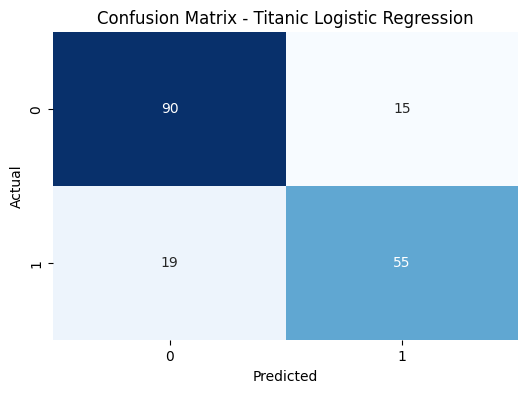

In [4]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Titanic Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
# Step 6: Export actual vs predicted results
predicted_df = X_test.copy()
predicted_df['Actual_Survived'] = y_test.values
predicted_df['Predicted_Survived'] = y_pred

# Save to CSV
predicted_df.to_csv("/content/titanic_predictions.csv", index=False)
print("File saved: titanic_predictions.csv")

# Preview the first few rows
predicted_df.head()

✅ File saved: titanic_predictions.csv


,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,Actual_Survived,Predicted_Survived
709,3,0,28.0,1,1,15.2458,False,False,1,0
439,2,0,31.0,0,0,10.5000,False,True,0,0
840,3,0,20.0,0,0,7.9250,False,True,0,0
720,2,1,6.0,0,1,33.0000,False,True,1,1
39,3,1,14.0,1,0,11.2417,False,False,1,1
